In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart_edited')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:xlabel='target', ylabel='count'>

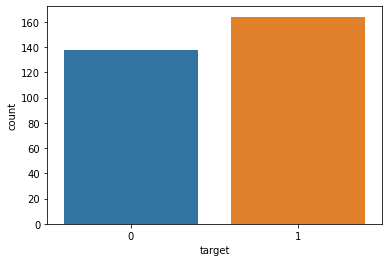

In [4]:
sns.countplot(data=df, x='target')

<AxesSubplot:xlabel='age', ylabel='chol'>

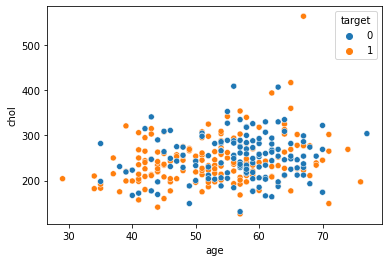

In [5]:
sns.scatterplot(x ='age', y='chol', data=df, hue='target')

# Train | Test Split and Scaling

In [6]:
X = df.drop('target', axis =1)
y = df['target']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=101)

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Gridsearch for best hyper-parameters

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [11]:
log_model = LogisticRegression(solver='liblinear')

In [12]:
penalty = ['l1','l2']
C = np.logspace (0, 4, 10)

In [13]:
grid_model = GridSearchCV(log_model, param_grid = {'C':C, 'penalty':penalty})

In [14]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [15]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [36]:
coeff = grid_model.best_estimator_.coef_
coeff

array([[-0.06788137, -0.72487345,  0.86031807, -0.30632096, -0.13175198,
         0.04624179,  0.23476574,  0.35647499, -0.40606519, -0.63187019,
         0.28287843, -0.70066014, -0.57011959]])

In [37]:
target_coeff = df.drop('target', axis=1)

In [38]:
target_coeff.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [39]:
sort_coeff = {}
a=0
for i in coeff[0]:
    sort_coeff[target_coeff.keys()[a]]=coeff[0][a]
    a=a+1

In [40]:
sort_coeff

{'age': -0.06788136585662959,
 'sex': -0.7248734546507367,
 'cp': 0.8603180740266513,
 'trestbps': -0.3063209646991936,
 'chol': -0.1317519801465615,
 'fbs': 0.04624179094431083,
 'restecg': 0.2347657413832211,
 'thalach': 0.35647498819875884,
 'exang': -0.4060651922629865,
 'oldpeak': -0.6318701934964471,
 'slope': 0.28287843491013653,
 'ca': -0.7006601364436542,
 'thal': -0.5701195867203045}

In [41]:
df_coef= pd.DataFrame(list(sort_coeff.items()), columns = ['Feature', 'Coefficient'])

In [42]:
df_coef

,Feature,Coefficient
0,age,-0.067881
1,sex,-0.724873
2,cp,0.860318
3,trestbps,-0.306321
4,chol,-0.131752
5,fbs,0.046242
6,restecg,0.234766
7,thalach,0.356475
8,exang,-0.406065
9,oldpeak,-0.631870


In [43]:
df_coef = df_coef.sort_values('Coefficient')

In [44]:
df_coef

,Feature,Coefficient
1,sex,-0.724873
11,ca,-0.700660
9,oldpeak,-0.631870
12,thal,-0.570120
8,exang,-0.406065
3,trestbps,-0.306321
4,chol,-0.131752
0,age,-0.067881
5,fbs,0.046242
6,restecg,0.234766


<AxesSubplot:xlabel='Feature', ylabel='Coefficient'>

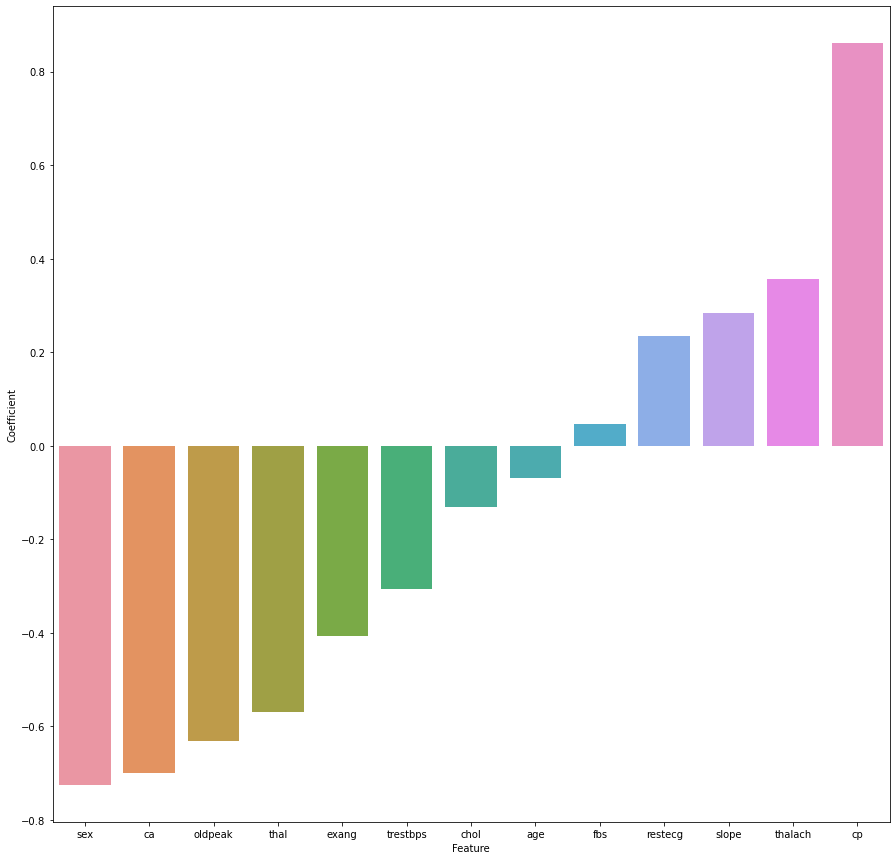

In [45]:
plt.figure(figsize=(15,15))
sns.barplot(data=df_coef, y='Coefficient', x='Feature')

# Model Performance

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [17]:
y_pred = grid_model.predict(scaled_X_test)

In [18]:
accuracy_score(y_test, y_pred)

0.9032258064516129

In [19]:
confusion_matrix(y_test, y_pred)

array([[12,  2],
       [ 1, 16]], dtype=int64)

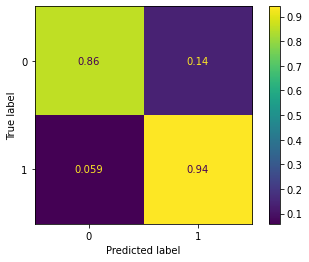

In [20]:
plot_confusion_matrix(grid_model, scaled_X_test, y_test, normalize ='true')

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.89      0.94      0.91        17

    accuracy                           0.90        31
   macro avg       0.91      0.90      0.90        31
weighted avg       0.90      0.90      0.90        31



# Evaluating curves & AUC

In [22]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

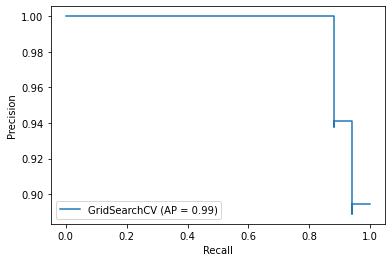

In [23]:
plot_precision_recall_curve(grid_model, scaled_X_test, y_test);

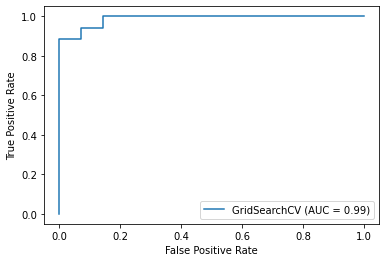

In [24]:
plot_roc_curve(grid_model, scaled_X_test, y_test);

# Model Selection

In [25]:
log_model1 = LogisticRegression()

In [26]:
log_model1.fit(scaled_X_train, y_train)

LogisticRegression()

In [27]:
prediction = log_model1.predict(scaled_X_test)

In [28]:
 df_predicted= pd.DataFrame(prediction)

In [29]:
df_predicted.columns

RangeIndex(start=0, stop=1, step=1)

In [30]:
df_predicted.rename(columns = {0:'Predicted'}, inplace = True)

In [31]:
df_predicted

,Predicted
0,1
1,1
2,1
3,1
4,0
5,1
6,1
7,0
8,0
9,1


In [32]:
type (y_test)

pandas.core.series.Series

In [33]:
df_predicted['y_test'] = y_test.to_frame().reset_index()['target']

In [34]:
df_predicted

,Predicted,y_test
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
5,1,1
6,1,1
7,0,0
8,0,0
9,1,1


# Saving Model

In [47]:
from joblib import dump, load

In [48]:
dump(scaler, 'heart_scaler.pkl')

['heart_scaler.pkl']

In [49]:
dump(log_model1,'heart_model.h5')

['heart_model.h5']